# tools for pre-processing images

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [2]:
__author__ = 'Pascal Louis <plouis35@gmail.com>'
__version__ = '0.1 alpha'
__keywords__ = ['astronomy', 'astropy', 'astroalign', 'ccdproc', 'matplotlib']


## configure display

In [3]:
### allow full width of browser
from IPython.display import display, HTML
display(HTML("<style>:root { --jp-notebook-max-width: 100% !important; }</style>"))

### matplotlib settings
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.rc = {}
plt.style.use(['dark_background'])
plt.rcParams.update({'figure.max_open_warning': 0})      


## import libraries

In [4]:
import fnmatch, os
from astropy import units as u
from astropy.nddata import CCDData
from ccdproc import ImageFileCollection, cosmicray_median, cosmicray_lacosmic, gain_correct
from easycombiner import Images

### collect and sort (according to fit header 'date') file names using a wildcard filter
def find_files(directory: str, files_filter: str, sort_key: str = 'date-obs'):
    ic = ImageFileCollection(directory, glob_include=files_filter)
    ic.sort([sort_key])
    return (ic.files_filtered(include_path=True))

### simple image display
def show_image(img):
    #img = lights_c[1]
    #p2, p98 = np.percentile(img, (2, 98))
    #l_rescale = sk.exposure.rescale_intensity(img, in_range=(p2, p98))
    #plt.imshow(l_rescale / np.max(l_rescale), cmap="gray")
    colormap = plt.cm.inferno
    cuts = (5, 99.5)
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    plt.tight_layout()
    im = ax.imshow(img, origin='lower', aspect='auto', cmap=colormap)
    cb = plt.colorbar(im)
    im.set_clim(np.percentile(img, cuts))
    plt.show()



## define targets

In [5]:
CAPTURE_DIR='../../../CAPTURES/NY_Vir/'
BIAS_FILES = "offset-15c-Bin2-*.fits"
DARK_FILES = "darkBin2X-35C-30s-*.fits"
FLAT_FILES = "Flat_v-*.fits"
CALIB_FILES = ""
SCIENCE_FILES = "NY VIR2*.fits"
TRIM_REGION = None
EXPOSURE_KEY = 'EXPOSURE'

In [197]:
CAPTURE_DIR='../../../CAPTURES/2023_RENNES_L3_TP/images_spectro/images_tp_spectro/'
BIAS_FILES = "offset-*.fit"
DARK_FILES = "noir-600-*.fit"
FLAT_FILES = "flat-*.fit"
CALIB_FILES = "neon-*.fit"
SCIENCE_FILES = "agdra-*.fit"
TRIM_REGION = '600, 600, 2700, 1400'              # x1, y1, x2, y2 
#TRIM_REGION = None
EXPOSURE_KEY = 'EXPTIME'

In [7]:
CAPTURE_DIR='../../../CAPTURES/20231008_Void/'
BIAS_FILES = "Bias-0s-*.fit"
DARK_FILES = "Dark-300s-*.fit"
FLAT_FILES = "flat-*.fit"
CALIB_FILES = "neon-15s-*.fit"
SCIENCE_FILES = "deneb-200s-*.fit"
TRIM_REGION = None   
EXPOSURE_KEY = 'EXPTIME'

In [268]:
CAPTURE_DIR='../../../CAPTURES/20231007_Void/'
BIAS_FILES = "Bias-*.fit"
DARK_FILES = "Dark-300s-*.fit"
FLAT_FILES = "flat-*.fit"
CALIB_FILES = "neon-10s-*.fit"
SCIENCE_FILES = "10lac-300s-*.fit"
TRIM_REGION = None
#TRIM_REGION = '0, 600, 1600, 700'  
EXPOSURE_KEY = 'EXPTIME'

In [9]:
CAPTURE_DIR='../../../CAPTURES/HAT-P-32b/'
BIAS_FILES = "d*BIASR*.fit"
DARK_FILES = None
FLAT_FILES = "d*FLATR*.fit"
CALIB_FILES = None
SCIENCE_FILES = "d*UW32R10*.fit"
TRIM_REGION = None
EXPOSURE_KEY = 'EXPOSURE'

In [10]:
CAPTURE_DIR='../../../CAPTURES/20180818_spectro/'
BIAS_FILES = "offset-0*.fit"
DARK_FILES = "dark-300s-*.fit"
FLAT_FILES = "flat-0*.fit"
CALIB_FILES = "neon-00*.fit"
SCIENCE_FILES = "rrLyr-0*.fit"
TRIM_REGION = None
EXPOSURE_KEY = 'EXPTIME'

## define gain & readout noise

In [269]:
### define gain @ readout noise for the camera (atik 420m)
camera_electronic_gain = 1.2 * u.electron/u.adu      # asi 183mm
camera_readout_noise = 2.2 * u.electron        # asi 183mm

#camera_electronic_gain = 0.13 * u.electron/u.adu   # atik 420m 
#camera_readout_noise = 3.0 * u.electron     # atik 420m


## define logger

In [270]:
### use easy logger
#from logger_utils import logger, handler
#handler.show_logs()
#logger.setLevel('INFO')
#handler.clear_logs()

### use standard logger
import sys
import logging

logging.basicConfig(
    format='%(asctime)s [%(levelname)s] - %(message)s',
    level=logging.INFO,
    datefmt='%Y-%m-%d %H:%M:%S',
    stream=sys.stdout,
)
logger = logging.getLogger('notebook')


## create masterbias

In [271]:
### create master bias
if (BIAS_FILES is not None): # and not (os.path.exists(CAPTURE_DIR + 'masterbias.fit')):
    master_bias = Images.from_fit(find_files(CAPTURE_DIR, BIAS_FILES)) \
                            .trim(TRIM_REGION) \
                            .median() 
    master_bias.write(CAPTURE_DIR + 'masterbias.fit', overwrite=True) 
    print(f'min={master_bias.min()}, max={master_bias.max()}, avg={master_bias.mean()}')


2024-04-14 20:53:01 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:01 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:01 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:01 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:01 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:01 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:01 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:01 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:01 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:01 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:01 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:01 [WARNING] - Negative values in array will be replaced with nan
2024

## create masterdark

In [272]:
### create master dark
if (DARK_FILES is not None): # and not (os.path.exists(CAPTURE_DIR + 'masterdark.fit')):
    master_dark = Images.from_fit(find_files(CAPTURE_DIR, DARK_FILES)) \
                                .trim(TRIM_REGION) \
                                .bias_substract(master_bias) \
                                .median()
#                                .offset(1000 * u.adu) \
    master_dark.write(CAPTURE_DIR + 'masterdark.fit', overwrite=True) 
    print(f'min={master_dark.min()}, max={master_dark.max()}, avg={master_dark.mean()}')


2024-04-14 20:53:15 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:15 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:15 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:15 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:15 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:15 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:15 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:15 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:15 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:15 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:15 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:15 [WARNING] - Negative values in array will be replaced with nan
2024

## create masterflat

In [273]:
### create master flat
if (FLAT_FILES is not None): # and not (os.path.exists(CAPTURE_DIR + 'masterflat.fit')):
    master_flat = Images.from_fit(find_files(CAPTURE_DIR, FLAT_FILES)) \
                                .trim(TRIM_REGION) \
                                .bias_substract(master_bias) \
                                .median()
#                                .offset(1000 * u.adu) \
    master_flat.write(CAPTURE_DIR + 'masterflat.fit', overwrite=True) 
    print(f'min={master_flat.min()}, max={master_flat.max()}, avg={master_flat.mean()}')



2024-04-14 20:53:49 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:49 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:49 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:49 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:49 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:49 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:49 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:49 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:49 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:49 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:50 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:53:50 [WARNING] - Negative values in array will be replaced with nan
2024

## create mastercalib

In [274]:
### create master calib
if (CALIB_FILES is not None): # and not (os.path.exists(CAPTURE_DIR + 'mastercalib.fit')):
    master_calib = Images.from_fit(find_files(CAPTURE_DIR, CALIB_FILES)) \
                                .trim(TRIM_REGION) \
                                .bias_substract(master_bias) \
                                .median()
#                                .offset(1000 * u.adu) \
    master_calib.write(CAPTURE_DIR + 'mastercalib.fit', overwrite=True) 
    print(f'min={master_calib.min()}, max={master_calib.max()}, avg={master_calib.mean()}')


2024-04-14 20:54:01 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:54:01 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:54:01 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:54:01 [INFO] - set of images : ['../../../CAPTURES/20231007_Void/neon-10s-1.fit', '../../../CAPTURES/20231007_Void/neon-10s-2.fit', '../../../CAPTURES/20231007_Void/neon-10s-3.fit'] loaded
2024-04-14 20:54:01 [INFO] - no trimming
2024-04-14 20:54:02 [INFO] - float32 bias substracted to 3 images
2024-04-14 20:54:02 [INFO] - median combine on 3 images ...
min=-112.0 adu, max=40019.0 adu, avg=428.59995 adu


## reduce science frames

In [276]:
### reduce and align science frames
master_sciences = Images.from_fit(find_files(CAPTURE_DIR, SCIENCE_FILES)) \
                            .trim(TRIM_REGION) \
                            .bias_substract(master_bias) \
                            .dark_substract(master_dark, scale_exposure = True, exposure = EXPOSURE_KEY) \
                            .flat_divide(master_flat) \
                            .offset(5000 * u.adu) \
                            .spec_align(ref_image_index = 0) 
#                            .star_align(ref_image_index = 0)

for i, frame in zip(range(0, len(master_sciences)), master_sciences):
    frame.write(f'{CAPTURE_DIR}science_reduced_{i}.fit', overwrite=True)
    print(f'frame {i}: min={frame.min()}, max={frame.max()}, avg={frame.mean()}')


### combine science frames
master_science = master_sciences.sum() 
#master_science = master_sciences.median()
master_science.write(CAPTURE_DIR + 'masterscience.fit', overwrite=True) 
print(f'master_science: min={master_science.min()}, max={master_science.max()}, avg={master_science.mean()}')


2024-04-14 20:54:27 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:54:27 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:54:27 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:54:27 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:54:27 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:54:27 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:54:27 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:54:27 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:54:27 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:54:27 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:54:27 [WARNING] - Negative values in array will be replaced with nan
2024-04-14 20:54:27 [WARNING] - Negative values in array will be replaced with nan
2024

## remove cosmics

In [295]:
from astropy.convolution import convolve, Gaussian2DKernel, Tophat2DKernel
from astropy.modeling.models import Gaussian2D
from astropy.convolution import Box2DKernel

### reduce and align science frames
camera_electronic_gain = 0.13 * u.electron/u.adu   # atik 420m 
camera_readout_noise = 3.0 * u.electron     # atik 420m

#print(master_sciences[0].unit)
#print(master_science.unit)

gain_corrected = gain_correct(master_science, camera_electronic_gain)
print(f'gain_corrected: min={gain_corrected.min()}, max={gain_corrected.max()}, avg={gain_corrected.mean()}')

#print(gain_corrected.unit)

#master_science_clean = cosmicray_lacosmic(gain_corrected,
 #                                         satlevel = 1e999,
  #                                        niter = 1,
   #                                       gain_apply = False,
    #                                      sigclip = 5,
     #                                     cleantype = 'median',
      #                                    fsmode = 'median',
       #                                   verbose = True
        #                                 )
#master_science_clean = cosmicray_median(gain_corrected,
 #                                       error_image = None,
  #                                      thresh = 15,
   #                                     mbox = 11,
    #                                    rbox = 11, 
     #                                   gbox = 0)

tophat_kernel = Box2DKernel(5)
master_science_clean = convolve(gain_corrected, tophat_kernel)

#master_science_clean = CCDData(CCDData.add(master_science_clean, 1000 * u.electron))
                                
#print(master_science_clean.unit)
print(f'master_science_clean: min={master_science_clean.min()}, max={master_science_clean.max()}, avg={master_science_clean.mean()}')

#master_science_clean.write(CAPTURE_DIR + 'masterscience_clean.fit', overwrite=True) 


gain_corrected: min=-679912.25 electron, max=348154.47 electron, avg=8745.425 electron
master_science_clean: min=-19377.685546875, max=137195.359375, avg=8729.9150390625


In [296]:
master_science_clean.uncertainty

AttributeError: 'numpy.ndarray' object has no attribute 'uncertainty'

## show data

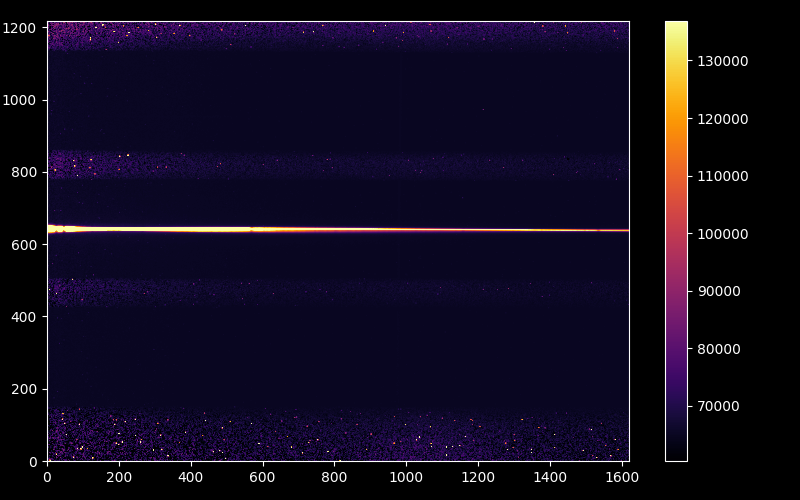

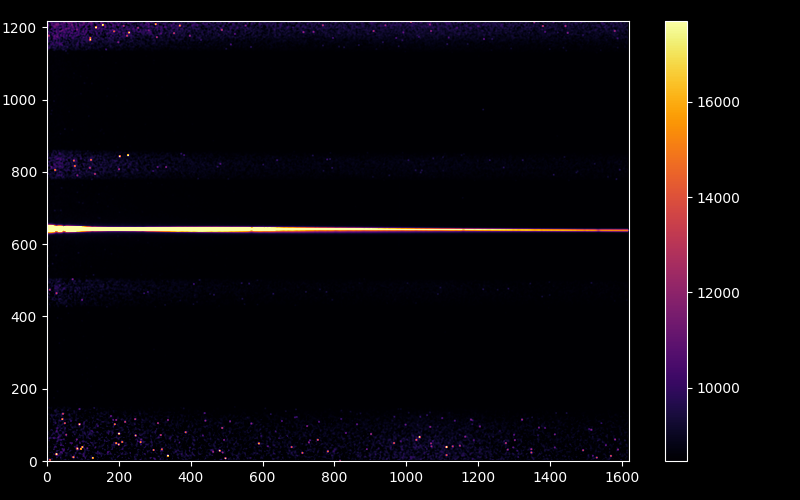

In [297]:
plt.close('all')
#master_bias = CCDData.read(CAPTURE_DIR + 'masterbias.fit')

#show_image(master_bias)
#show_image(master_dark)
#show_image(master_flat)
#show_image(master_calib)
#show_image(master_sciences[0])
#show_image(master_sciences[6])

show_image(master_science)
show_image(master_science_clean)

